# Lesson 4 -1D Burgers' Equation

## Notes:
* the equation we are working with is: 
$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^{2}u}{\partial x^{2}}$$
* using the discretization schema (forward difference on the temporal axis; backward difference on the spatial axis, central difference on the second order differential), we get:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$
* the boundary condition is a periodic boundary condition: $u(0)=u(2\pi)$

* once you declare a variable as a symbol, it'll act like math. just remember that

$$\sigma = \frac{c\Delta t}{\Delta x}\leq 1$$

## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

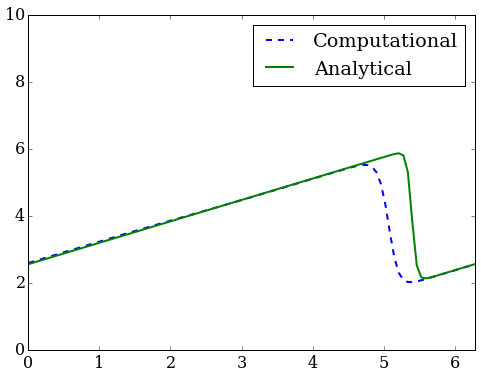

In [6]:
import sympy, numpy
from matplotlib import pyplot, rcParams
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16
init_printing()

## Experimenting with SymPy
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))
#/phi
phiprime=phi.diff(x)
#phiprime
u = -2*nu*(phiprime/phi)+4
#u
#print(u)
u_lamb = lambdify((t, x, nu), u)
#print("The value of u at t=1, x=4, nu=3 is {}.".format(u_lamb(1,4,3)))

## Back to the problem at hand
nx = 101
nt = 100
dx = 2*numpy.pi/(nx-1)
nu = .07
sigma = .1
dt = sigma*dx**2/nu 

x = numpy.linspace(0, 2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0

'''List Comprehension Use - for a single command to be nested in a for loop, use syntax <command> for <variable> in 
<raange> to create a list, and then cast it forward into an array shape for handling and use.'''
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

## get analytical solution for comparison:
for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
    u_analytical = numpy.asarray([u_lamb(nt*dt, xi, nu) for xi in x])
    
# Visualize
pyplot.figure(figsize=(8,6))
pyplot.plot(x,u,ls='--',lw=2,label="Computational")
pyplot.plot(x, u_analytical,lw=2,label='Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend()

In [4]:
## Using Cell magic to test the double for loop convention in terms of speed
import timeit
import numpy

def func():
    u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

    for n in range(nt):
        un = u.copy()

        for i in range(nx-1):
            u[i] = un[i] - un[i] * dt/dx *(un[i] - un[i-1]) + nu*dt/dx**2*\
                    (un[i+1]-2*un[i]+un[i-1])

        u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                    (un[0]- 2*un[-1] + un[-2])
    
print(timeit.timeit(func()))

NameError: name 'x' is not defined

In [1]:
## Using Cell magic to test the lapply-style convention in terms of speed
%%timeit

u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])

SyntaxError: invalid syntax (<ipython-input-1-e3920ebbc7e1>, line 2)